In [1]:
from functools import partial

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision.datasets as dsets
import torchvision.transforms as T

from ignite.engine import Engine, Events
from ignite.metrics import Average

import matplotlib.pyplot as plt

from modules import Generator, Discriminator
from models import HingeGAN

# Data

## Dataloader

In [2]:
train_data = dsets.CIFAR10("./", download=True, transform=T.ToTensor())
train_loader = DataLoader(train_data, batch_size=256, shuffle=True)

Files already downloaded and verified


## Data arguments

In [3]:
input_size = 32

# Model

## Model arguments

In [4]:
latent_dim = 100
hidden_channel = 128
G_last_act = "sigmoid"

## Make model

In [5]:
generator = Generator(input_size=input_size, latent_dim=latent_dim, hidden_channel=hidden_channel, last_act=G_last_act)
discriminator = Discriminator(input_size=input_size, hidden_channel=hidden_channel)

In [6]:
model = HingeGAN(
    generator=generator,
    generator_opt=torch.optim.Adam(generator.parameters(), 1e-4),
    discriminator=discriminator,
    discriminator_opt=torch.optim.Adam(discriminator.parameters(), 1e-4),
)

In [7]:
if torch.cuda.is_available():
    _ = model.cuda(1)

# Trainer

## Set Ignite Engine

In [8]:
trainer = Engine(model.fit_batch)

## Set metrics

In [9]:
from utils import output_transform

In [10]:
for key in ["G_loss", "D_loss"]:
    average = Average(output_transform=partial(output_transform, key=key))
    average.attach(trainer, key)

## Add event handlers

In [11]:
from utils.event_handlers import log_metric, print_img, print_metric

In [12]:
trainer.add_event_handler(Events.EPOCH_COMPLETED, log_metric)
trainer.add_event_handler(Events.EPOCH_COMPLETED(every=1), print_metric)
trainer.add_event_handler(Events.EPOCH_COMPLETED(every=1), print_img, model)

## Run

Epoch 1 - G_loss: 5.1739, D_loss: 0.0493, 


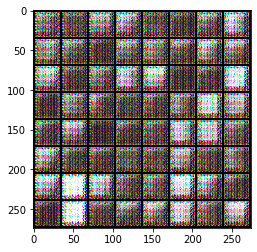

Epoch 2 - G_loss: 2.5887, D_loss: 0.0335, 


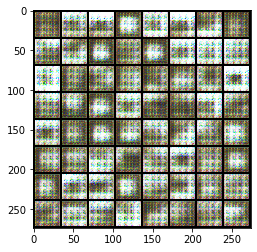

Epoch 3 - G_loss: 2.2700, D_loss: 0.0238, 


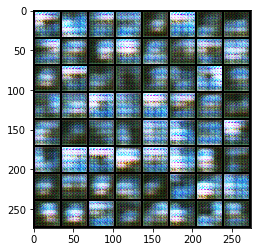

Epoch 4 - G_loss: 3.1072, D_loss: 0.0303, 


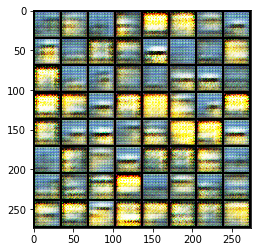

Epoch 5 - G_loss: 2.7115, D_loss: 0.0225, 


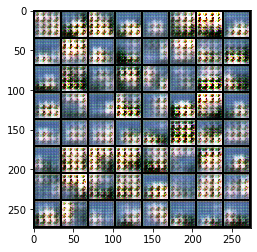

Epoch 6 - G_loss: 2.7880, D_loss: 0.0203, 


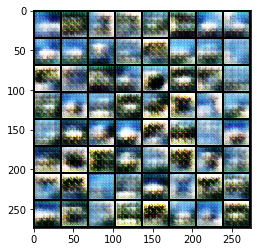

Epoch 7 - G_loss: 2.7812, D_loss: 0.0296, 


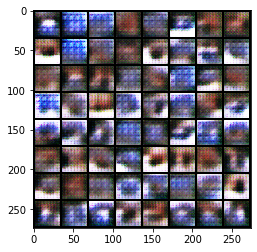

Epoch 8 - G_loss: 2.8083, D_loss: 0.0352, 


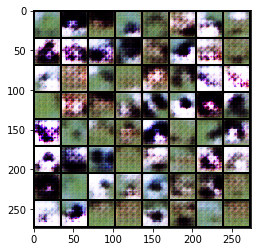

Epoch 9 - G_loss: 2.4778, D_loss: 0.0248, 


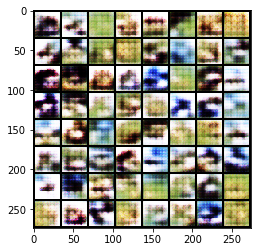

Epoch 10 - G_loss: 2.5375, D_loss: 0.0204, 


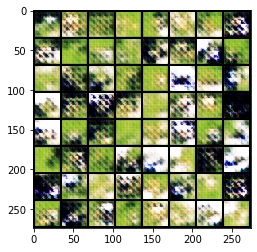

Epoch 11 - G_loss: 2.8454, D_loss: 0.0327, 


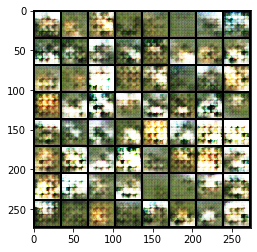

Epoch 12 - G_loss: 2.3588, D_loss: 0.0176, 


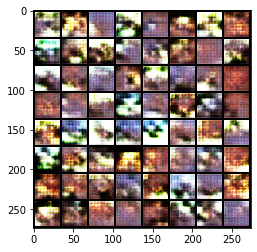

Epoch 13 - G_loss: 2.5387, D_loss: 0.0223, 


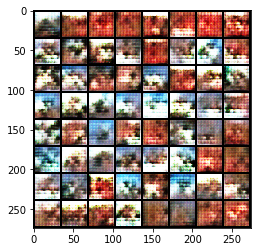

Epoch 14 - G_loss: 2.6026, D_loss: 0.0254, 


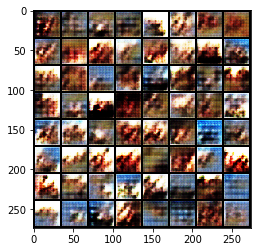

Epoch 15 - G_loss: 2.9523, D_loss: 0.0361, 


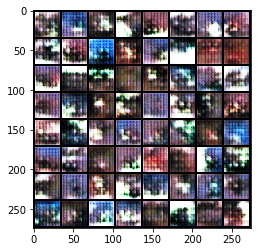

Epoch 16 - G_loss: 2.6752, D_loss: 0.0299, 


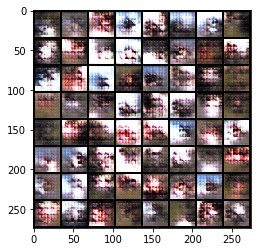

Epoch 17 - G_loss: 2.9006, D_loss: 0.0384, 


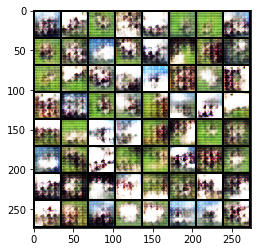

Epoch 18 - G_loss: 2.5079, D_loss: 0.0265, 


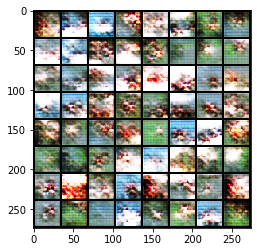

Epoch 19 - G_loss: 2.5462, D_loss: 0.0238, 


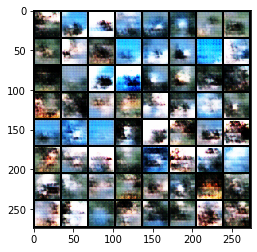

Epoch 20 - G_loss: 2.7487, D_loss: 0.0303, 


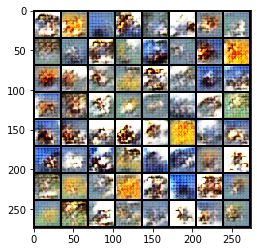

Epoch 21 - G_loss: 2.6894, D_loss: 0.0342, 


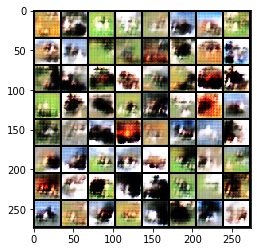

Epoch 22 - G_loss: 2.7302, D_loss: 0.0294, 


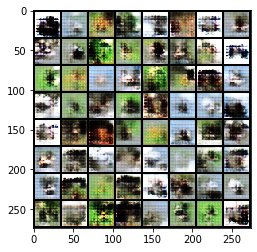

Epoch 23 - G_loss: 2.7309, D_loss: 0.0308, 


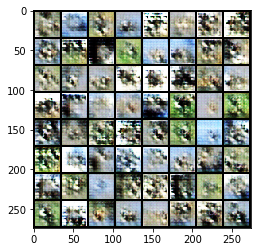

Epoch 24 - G_loss: 2.6724, D_loss: 0.0370, 


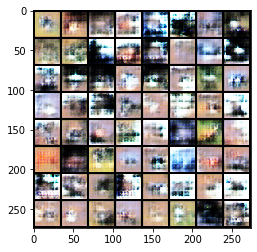

In [ ]:
trainer.run(train_loader, 50)